<a href="https://colab.research.google.com/github/Siri0025/Predictive-Analysis-of-Stock-Prices-Using-Time-Series-Forecasting/blob/main/predictive_analysis_of_stock_prices_using_time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow -qqq
!pip install keras -qqq
!pip install yfinance -qqq


In [ ]:
import tensorflow as tf
import keras
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Check TensorFlow version
print("TensorFlow Version: ", tf.__version__)


TensorFlow Version:  2.17.0


In [ ]:
# Fetch AAPL data
aapl_data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')

# Display the first few rows of the dataframe
aapl_data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876114,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167618,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742645,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400536,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565193,132079200


In [ ]:
# Checking for missing values
aapl_data.isnull().sum()

# Filling missing values, if any
aapl_data.fillna(method='ffill', inplace=True)

<ipython-input-4-80ede9f98b96>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aapl_data.fillna(method='ffill', inplace=True)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
aapl_data_scaled = scaler.fit_transform(aapl_data['Close'].values.reshape(-1,1))


In [ ]:
X = []
y = []

for i in range(60, len(aapl_data_scaled)):
    X.append(aapl_data_scaled[i-60:i, 0])
    y.append(aapl_data_scaled[i, 0])


In [ ]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# from keras.models import Sequential
# from keras.layers import LSTM, Dense, Dropout

# # Model initialization
# model = Sequential()

# # Adding the first LSTM layer
# model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))

# # Adding additional LSTM layers
# model.add(LSTM(units=50, return_sequences=True))
# model.add(LSTM(units=50))


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()

# Adding LSTM layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=False))  # Only the last time step

# Adding a Dense layer to match the output shape with y_train
model.add(Dense(1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.1278 - val_loss: 0.0085
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0078 - val_loss: 0.0027
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0027 - val_loss: 0.0030
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0028 - val_loss: 0.0031
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0025 - val_loss: 0.0028
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0023 - val_loss: 0.0029
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0021 - val_loss: 0.0026
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0025 - val_loss: 0.0031
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0021 - val_loss: 0.0034
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

In [ ]:
from keras.models import Model
from keras.layers import LSTM, Dense, Dropout, AdditiveAttention, Permute, Reshape, Multiply, Input, Flatten
import tensorflow as tf

# Input layer
input_layer = Input(shape=(X_train.shape[1], 1))

# LSTM layers
lstm_out1 = LSTM(units=50, return_sequences=True)(input_layer)
lstm_out2 = LSTM(units=50, return_sequences=True)(lstm_out1)

# Self-attention mechanism
attention = AdditiveAttention(name='attention_weight')([lstm_out2, lstm_out2])

# Multiply attention result with LSTM output
multiply_layer = Multiply()([lstm_out2, attention])

# Flatten layer before final Dense layer
flatten = Flatten()(multiply_layer)

# Output layer
output = Dense(1)(flatten)

# Define the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2268 - val_loss: 0.0141
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0129 - val_loss: 0.0068
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0062 - val_loss: 0.0072
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0063 - val_loss: 0.0066
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0062 - val_loss: 0.0055
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0061 - val_loss: 0.0055
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0059 - val_loss: 0.0052
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0058 - val_loss: 0.0070
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0061 - val_loss: 0.0068
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0052 - val_loss: 0.0040
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization, Flatten

model = Sequential()

# Adding LSTM layers with return_sequences=True
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))

# Adding Dropout and Batch Normalization after LSTM layers
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Continue with your model definition
model.add(Flatten())  # Flattening before the Dense layer

# Final Dense layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.7415 - val_loss: 0.3501
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0512 - val_loss: 0.3103
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0268 - val_loss: 0.2983
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0159 - val_loss: 0.2976
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0120 - val_loss: 0.2773
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0114 - val_loss: 0.2663
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0082 - val_loss: 0.2562
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0091 - val_loss: 0.2477
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0080 - val_loss: 0.2383
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0082 - val_loss: 0.2284
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0067 - val_loss: 0.2078
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.00

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Assume 'data' is your preprocessed dataset
train_size = int(len(aapl_data) * 0.8)
train_data, test_data = aapl_data[:train_size], aapl_data[train_size:]


In [ ]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 60, 50)              │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           3,001 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,801 (132.04 KB)

 Trainable params: 33,701 (131.64 KB)

 Non-trainable params: 100 (400.00 B)

In [ ]:
# Assuming X_train and y_train are already defined and preprocessed
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0086 - val_loss: 0.0014
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0040 - val_loss: 0.0016
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0023 - val_loss: 0.0123
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0034 - val_loss: 0.0013
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0021 - val_loss: 0.0023
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0021 - val_loss: 0.0179
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0031 - val_loss: 9.5066e-04
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0024 - val_loss: 0.0016
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/s

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.8321e-04 - val_loss: 9.5813e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.4403e-04 - val_loss: 0.0025
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.8726e-04 - val_loss: 0.0017
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.4741e-04 - val_loss: 7.8074e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.8038e-04 - val_loss: 0.0021
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.8245e-04 - val_loss: 7.4988e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.9463e-04 - val_loss: 0.0011
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.7459e-04 - val_loss: 7.3552e-04
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.4113e-04 - val_loss: 0.0028


In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard, CSVLogger, EarlyStopping

# Callback to save the model periodically in .keras format
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')


# Callback to reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Callback for TensorBoard
tensorboard = TensorBoard(log_dir='./logs')

# Callback to log details to a CSV file
csv_logger = CSVLogger('training_log.csv')

# Early stopping to stop training when validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Combining all callbacks
callbacks_list = [early_stopping, model_checkpoint, reduce_lr, tensorboard, csv_logger]

# Fit the model with the callbacks
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2, callbacks=callbacks_list)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 7.3999e-04 - val_loss: 0.0013 - learning_rate: 0.0010
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0010 - val_loss: 0.0029 - learning_rate: 0.0010
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.4984e-04 - val_loss: 0.0023 - learning_rate: 0.0010
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.9734e-04 - val_loss: 0.0014 - learning_rate: 0.0010
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0011 - val_loss: 6.9143e-04 - learning_rate: 0.0010
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0011 - val_loss: 0.0035 - learning_rate: 0.0010
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.2778e-04 - val_loss: 0.0021 - learning_rate: 0.0010
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.8592e-04 - val_loss: 0.0023 - learning_rate: 0.0010
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.8511e-04 - val_loss: 0.0011 - lear

In [ ]:
# Convert X_test and y_test to Numpy arrays if they are not already
X_test = np.array(X_test)
y_test = np.array(y_test)

# Ensure X_test is reshaped similarly to how X_train was reshaped
# This depends on how you preprocessed the training data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Now evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print("Test Loss: ", test_loss)



6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.6271e-04 
Test Loss:  0.00035977375227957964


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Making predictions
y_pred = model.predict(X_test)

# Calculating MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error: ", mae)
print("Root Mean Square Error: ", rmse)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
Mean Absolute Error:  0.014580320487123663
Root Mean Square Error:  0.01896770341633721


In [ ]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Fetching the last 3 months of AAPL stock data (use '3mo' for more data)
data = yf.download('AAPL', period='3mo', interval='1d')

# Check if data is available
if data.empty:
    raise ValueError("No data fetched for the given period. Please check the ticker symbol and period.")

# Selecting the 'Close' price and converting to numpy array
closing_prices = data['Close'].values

# Selecting only the last 60 days of data
if len(closing_prices) < 60:
    raise ValueError("Not enough data available for the last 60 days.")
closing_prices = closing_prices[-60:]

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices.reshape(-1, 1))

# Prepare the latest 60 days of data for prediction
X_latest = scaled_data[-60:]  # Use the last 60 days for input

# Reshaping for the model (adding batch and time-step dimensions)
X_latest = np.reshape(X_latest, (1, X_latest.shape[0], 1))

# Making iterative predictions for the next 4 days
predicted_stock_prices = []
for _ in range(4):  # Predict for the next 4 days
    predicted_price = model.predict(X_latest)

    # Append the predicted price (rescaled to original values)
    predicted_stock_prices.append(scaler.inverse_transform(predicted_price)[0, 0])

    # Reshape predicted_price to (1, 1, 1) to match the input dimensions
    predicted_price_reshaped = predicted_price.reshape((1, 1, 1))

    # Update X_latest by appending the predicted price and removing the oldest day
    X_latest = np.append(X_latest[:, 1:, :], predicted_price_reshaped, axis=1)

# Output the predicted stock prices for the next 4 days
print("Predicted Stock Prices for the next 4 days:", predicted_stock_prices)


[*********************100%***********************]  1 of 1 completed


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted Stock Prices for the next 4 days: [226.53229, 226.86768, 226.49371, 226.23154]


In [ ]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Fetching the last 3 months of AAPL stock data (use '3mo' for more data)
data = yf.download('AAPL', period='3mo', interval='1d')

# Check if data is available
if data.empty:
    raise ValueError("No data fetched for the given period. Please check the ticker symbol and period.")

# Selecting the 'Close' price and converting to numpy array
closing_prices = data['Close'].values

# Ensure there are enough data points
if len(closing_prices) == 0:
    raise ValueError("No closing price data available to process.")

# Selecting only the last 60 days of data
if len(closing_prices) < 60:
    raise ValueError("Not enough data available for the last 60 days.")
closing_prices = closing_prices[-60:]

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices.reshape(-1, 1))

# Prepare the latest 60 days of data for prediction
X_latest = scaled_data[-60:]  # Use the last 60 days for input

# Reshaping for the model (adding batch and time-step dimensions)
X_latest = np.reshape(X_latest, (1, X_latest.shape[0], 1))

# Making iterative predictions for the next 4 days
predicted_stock_prices = []
for _ in range(4):  # Predict for the next 4 days
    predicted_price = model.predict(X_latest)

    # Append the predicted price (rescaled to original values)
    predicted_stock_prices.append(scaler.inverse_transform(predicted_price)[0, 0])

    # Reshape predicted_price to (1, 1, 1) to match the input dimensions
    predicted_price_reshaped = predicted_price.reshape((1, 1, 1))

    # Update X_latest by appending the predicted price and removing the oldest day
    X_latest = np.append(X_latest[:, 1:, :], predicted_price_reshaped, axis=1)

# Output the predicted stock prices for the next 4 days
print("Predicted Stock Prices for the next 4 days:", predicted_stock_prices)


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted Stock Prices for the next 4 days: [226.53229, 226.86768, 226.49371, 226.23154]


In [ ]:
!pip install mplfinance -qqq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 6.0 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


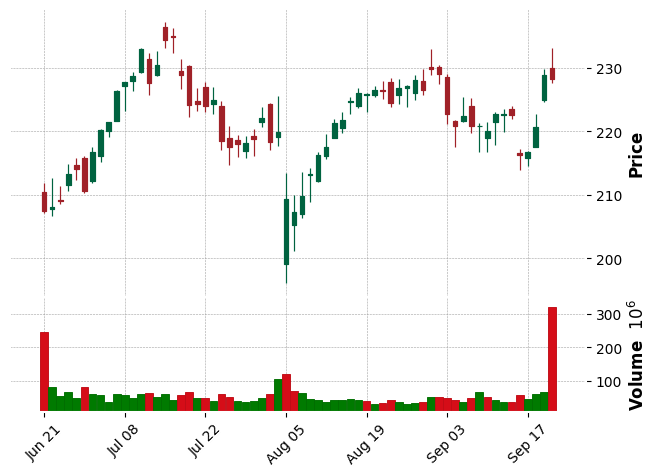

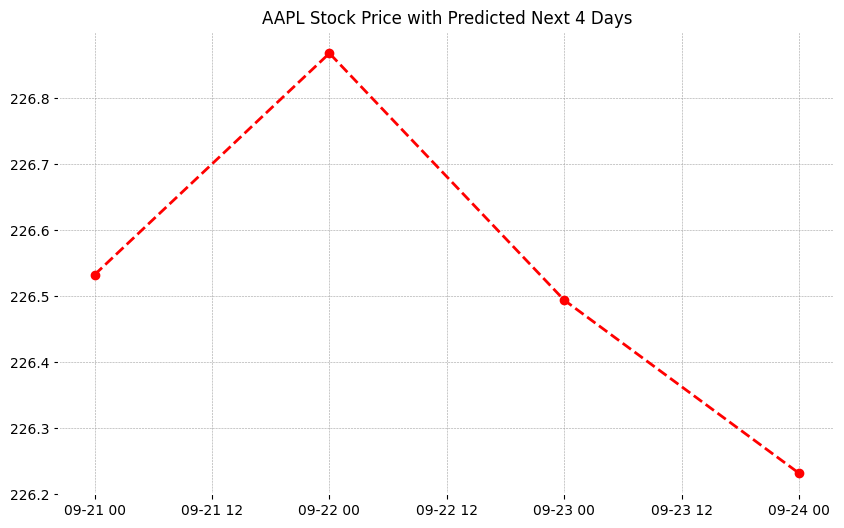

In [ ]:
import yfinance as yf
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

# Fetching the last 3 months of AAPL stock data (use '3mo' for more data)
data = yf.download('AAPL', period='3mo', interval='1d')

# Check if data is available
if data.empty:
    raise ValueError("No data fetched for the given period. Please check the ticker symbol and period.")

# Selecting the 'Close' price and converting to numpy array
closing_prices = data['Close'].values

# Ensure there are enough data points
if len(closing_prices) == 0:
    raise ValueError("No closing price data available to process.")
if len(closing_prices) < 60:
    raise ValueError("Not enough data available for the last 60 days.")
closing_prices = closing_prices[-60:]

# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices.reshape(-1, 1))

# Prepare the latest 60 days of data for prediction
X_latest = scaled_data[-60:]  # Use the last 60 days for input

# Reshaping for the model (adding batch and time-step dimensions)
X_latest = np.reshape(X_latest, (1, X_latest.shape[0], 1))

# Making iterative predictions for the next 4 days
predicted_prices = []
for _ in range(4):  # Predict for the next 4 days
    predicted_price = model.predict(X_latest)
    predicted_prices.append(scaler.inverse_transform(predicted_price)[0, 0])
    predicted_price_reshaped = predicted_price.reshape((1, 1, 1))
    X_latest = np.append(X_latest[:, 1:, :], predicted_price_reshaped, axis=1)

# Create a list of dates for the predictions
last_date = data.index[-1]
next_day = last_date + pd.Timedelta(days=1)
prediction_dates = pd.date_range(start=next_day, periods=4)

# Create a DataFrame for the predicted prices
predictions_df = pd.DataFrame(index=prediction_dates, data=predicted_prices, columns=['Close'])

# Plotting the actual data with mplfinance
mpf.plot(data, type='candle', style='charles', volume=True)

# Overlaying the predicted data
plt.figure(figsize=(10,6))
plt.plot(predictions_df.index, predictions_df['Close'], linestyle='dashed', marker='o', color='red')
plt.title("AAPL Stock Price with Predicted Next 4 Days")
plt.show()


[*********************100%***********************]  1 of 1 completed


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


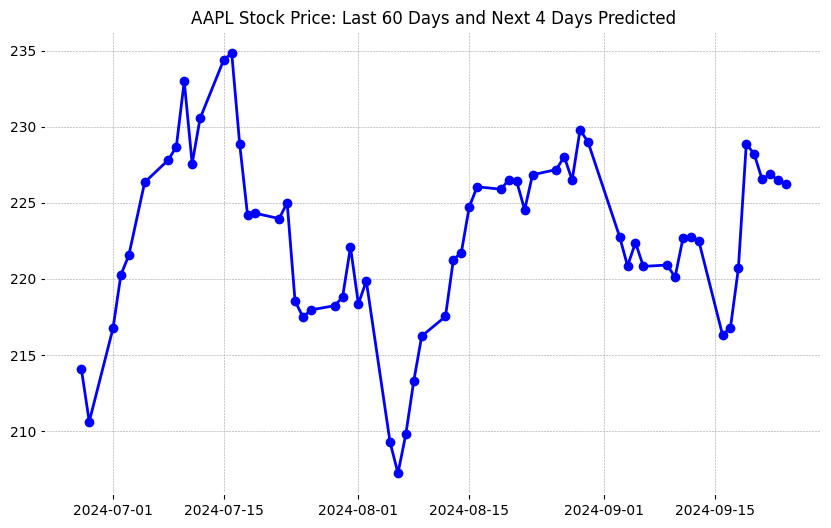

In [ ]:
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Fetch the latest 3 months of AAPL stock data (since '64d' is invalid)
data = yf.download('AAPL', period='3mo', interval='1d')  # Use '3mo' to get enough data

# Check if enough data is fetched
if data.empty:
    raise ValueError("No data fetched. Please check the ticker symbol and period.")

# Select 'Close' price and scale it
closing_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Predict the next 4 days iteratively
predicted_prices = []
current_batch = scaled_data[-60:].reshape(1, 60, 1)  # Most recent 60 days

for i in range(4):  # Predicting 4 days
    next_prediction = model.predict(current_batch)
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
    predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])

# Creating a list of dates for the predictions
last_date = data.index[-1]
next_day = last_date + pd.Timedelta(days=1)
prediction_dates = pd.date_range(start=next_day, periods=4)

# Adding predictions to the DataFrame
predicted_data = pd.DataFrame(index=prediction_dates, data=predicted_prices, columns=['Close'])

# Combining both actual and predicted data
combined_data = pd.concat([data['Close'], predicted_data['Close']])
combined_data = combined_data[-64:]  # Last 60 days of actual data + 4 days of predictions

# Plotting the data
plt.figure(figsize=(10,6))
plt.plot(combined_data, linestyle='-', marker='o', color='blue')
plt.title("AAPL Stock Price: Last 60 Days and Next 4 Days Predicted")
plt.show()


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


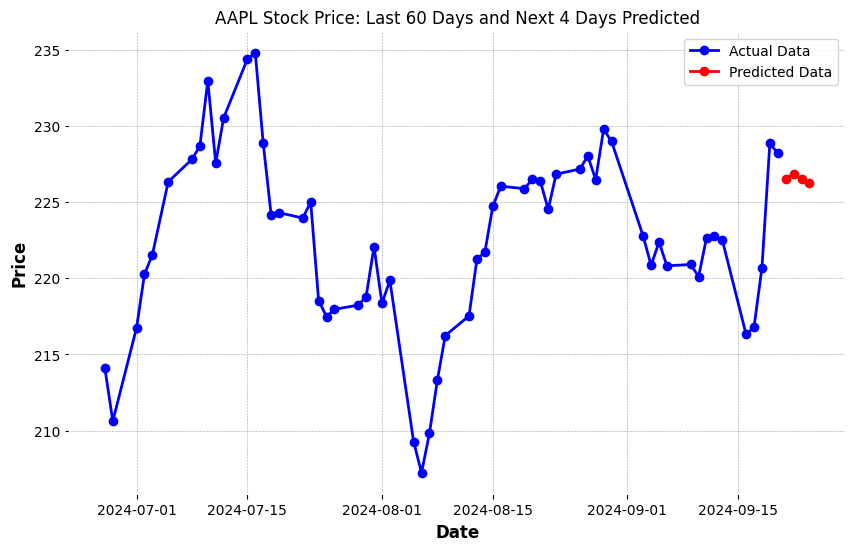

In [ ]:
import pandas as pd
import mplfinance as mpf
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Fetch the latest 3 months of AAPL stock data (since '64d' is invalid)
data = yf.download('AAPL', period='3mo', interval='1d')  # Use '3mo' to get enough data

# Check if enough data is fetched
if data.empty:
    raise ValueError("No data fetched. Please check the ticker symbol and period.")

# Select 'Close' price and scale it
closing_prices = data['Close'].values[-60:].reshape(-1, 1)  # Select last 60 days
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Predict the next 4 days iteratively
predicted_prices = []
current_batch = scaled_data[-60:].reshape(1, 60, 1)  # Most recent 60 days

for i in range(4):  # Predicting 4 days
    next_prediction = model.predict(current_batch)
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
    predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])

# Creating a list of dates for the predictions
last_date = data.index[-1]
next_day = last_date + pd.Timedelta(days=1)
prediction_dates = pd.date_range(start=next_day, periods=4)

# Adding predictions to the DataFrame
predicted_data = pd.DataFrame(index=prediction_dates, data=predicted_prices, columns=['Close'])

# Combining both actual and predicted data
combined_data = pd.concat([data['Close'], predicted_data['Close']])
combined_data = combined_data[-64:] # Last 60 days of actual data + 4 days of predictions

# Plotting the actual data
plt.figure(figsize=(10,6))
plt.plot(data.index[-60:], data['Close'][-60:], linestyle='-', marker='o', color='blue', label='Actual Data')

# Plotting the predicted data
plt.plot(prediction_dates, predicted_prices, linestyle='-', marker='o', color='red', label='Predicted Data')

# Title and labels for the plot
plt.title("AAPL Stock Price: Last 60 Days and Next 4 Days Predicted")  # Correct string literal
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta


def predict_stock_price(input_date):
    # Check if the input date is a valid date format
    try:
        input_date = pd.to_datetime(input_date)
    except ValueError:
        print("Invalid Date Format. Please enter date in YYYY-MM-DD format.")
        return

    # Fetch data from yfinance
    end_date = input_date
    start_date = input_date - timedelta(days=90)  # Fetch more days to ensure we have 60 trading days
    data = yf.download('AAPL', start=start_date, end=end_date)

    if len(data) < 60:
        print("Not enough historical data to make a prediction. Try an earlier date.")
        return

    # Prepare the data
    closing_prices = data['Close'].values[-60:]  # Last 60 days
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(closing_prices.reshape(-1, 1))

    # Make predictions
    predicted_prices = []
    current_batch = scaled_data.reshape(1, 60, 1)

    for i in range(4):  # Predicting 4 days
        next_prediction = model.predict(current_batch)
        next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
        current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
        predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])

    # Output the predictions
    for i, price in enumerate(predicted_prices, 1):
        print(f"Day {i} prediction: {price}")

# Example use
user_input = input("Enter a date (YYYY-MM-DD) to predict AAPL stock for the next 4 days: ")
predict_stock_price(user_input)


Enter a date (YYYY-MM-DD) to predict AAPL stock for the next 4 days: 2020-05-03


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Day 1 prediction: 73.02925109863281
Day 2 prediction: 73.36237335205078
Day 3 prediction: 73.4532699584961
Day 4 prediction: 73.47239685058594
